In [1]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import pandas as pd
import plotnine as p9

In [2]:
dane = pd.read_csv("../Data/beauty.csv")
print(dane)

     tenured  profnumber  minority  age  beautyf2upper  beautyflowerdiv  \
0          0           1         1   36              6                5   
1          1           2         0   59              2                4   
2          1           3         0   51              5                5   
3          1           4         0   40              4                2   
4          0           5         0   31              9                7   
..       ...         ...       ...  ...            ...              ...   
458        0          93         0   32              9                6   
459        0          93         0   32              9                6   
460        0          94         1   42              7                3   
461        0          94         1   42              7                3   
462        0          94         1   42              7                3   

     beautyfupperdiv  beautym2upper  beautymlowerdiv  beautymupperdiv  ...  \
0                  7 

In [3]:
results = smf.ols('courseevaluation ~ btystdave', data=dane).fit()
wyn=results.params
wyn

Intercept    4.010023
btystdave    0.133001
dtype: float64

In [4]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           4.25e-05
Time:                        09:00:48   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0100      0.026    157.205      0.000       3.960       4.060
btystdave      0.1330      0.032      4.133      0.000       0.070       0.196
==============================================================================
Omnibus:                       15.399   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.405
Skew:                          -0.453   Prob(JB):                     0.000274
Kurtosis:                       2.831   Cond. No.                         1.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
for col in dane.columns: 
    print(col) 

tenured
profnumber
minority
age
beautyf2upper
beautyflowerdiv
beautyfupperdiv
beautym2upper
beautymlowerdiv
beautymupperdiv
btystdave
btystdf2u
btystdfl
btystdfu
btystdm2u
btystdml
btystdmu
class1
class2
class3
class4
class5
class6
class7
class8
class9
class10
class11
class12
class13
class14
class15
class16
class17
class18
class19
class20
class21
class22
class23
class24
class25
class26
class27
class28
class29
class30
courseevaluation
didevaluation
female
formal
fulldept
lower
multipleclass
nonenglish
onecredit
percentevaluating
profevaluation
students
tenuretrack
blkandwhite
btystdvariance
btystdavepos
btystdaveneg


In [6]:
btystdave = dane['btystdave']

predicted_courseevaluation = wyn['Intercept'] + wyn['btystdave']*btystdave
predicted_courseevaluation

0      4.036831
1      3.900153
2      3.922197
3      3.908102
4      4.199077
         ...   
458    4.162049
459    4.162049
460    4.054186
461    4.054186
462    4.054186
Name: btystdave, Length: 463, dtype: float64

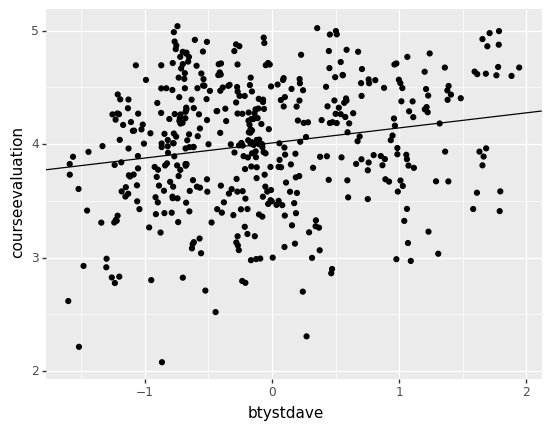

<ggplot: (-2108144009)>

In [7]:
fig1=(p9.ggplot(p9.aes(x='btystdave',y='courseevaluation'),data=dane)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['btystdave'])))
fig1

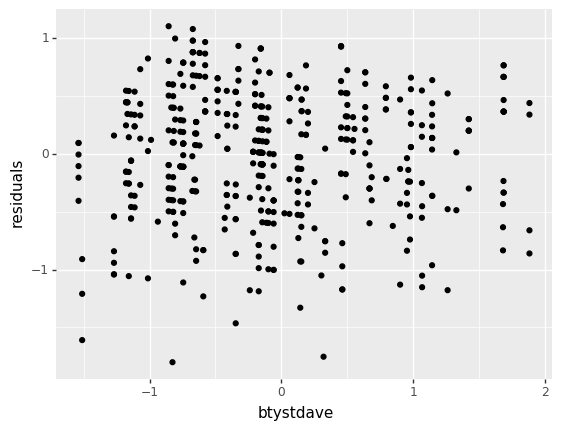

<ggplot: (-2108087888)>

In [8]:
df = dane
df['courseevaluation_pred']=results.predict()
df['residuals']=df['courseevaluation']-df['courseevaluation_pred']
fig1_res=(p9.ggplot(p9.aes(x='btystdave',y='residuals'),data=dane)
      +p9.geom_point())
fig1_res



In [9]:
results = smf.ols('courseevaluation ~ btystdave + btystdf2u + btystdfl + btystdfu + btystdm2u + btystdml + btystdmu', data=dane).fit()
wyn=results.params
wyn

Intercept        4.013306
btystdave   -16243.766560
btystdf2u     2707.317875
btystdfl      2707.280892
btystdfu      2707.371048
btystdm2u     2707.332496
btystdml      2707.222129
btystdmu      2707.372251
dtype: float64

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.929
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           0.000355
Time:                        09:00:48   Log-Likelihood:                -370.16
No. Observations:                 463   AIC:                             756.3
Df Residuals:                     455   BIC:                             789.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0133      0.026    154.810      0.000       3.962       4.064
btystdave  -1.624e+04   1.81e+05     -0.090      0.928   -3.71e+05    3.39e+05
btystdf2u   2707.3179   3.01e+04      0.090      0.928   -5.65e+04    6.19e+04
btystdfl    2707.2809   3.01e+04      0.090      0.928   -5.65e+04    6.19e+04
btystdfu    2707.3710   3.01e+04      0.090      0.928   -5.65e+04    6.19e+04
btystdm2u   2707.3325   3.01e+04      0.090      0.928   -5.65e+04    6.19e+04
btystdml    2707.2221   3.01e+04      0.090      0.928   -5.65e+04    6.19e+04
btystdmu    2707.3723   3.01e+04      0.090      0.928   -5.65e+04    6.19e+04
==============================================================================
Omnibus:                       21.286   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.474
Skew:                          -0.550   Prob(JB):                     7.99e-06
Kurtosis:                       2.922   Cond. No.                     1.63e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.74e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

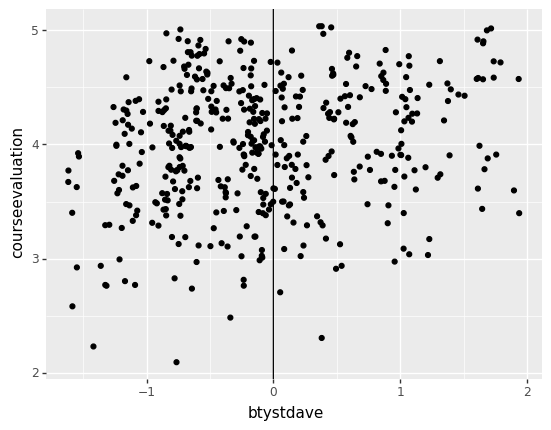

<ggplot: (-2108020798)>

In [11]:
fig1=(p9.ggplot(p9.aes(x='btystdave',y='courseevaluation'),data=dane)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['btystdave'])))
fig1

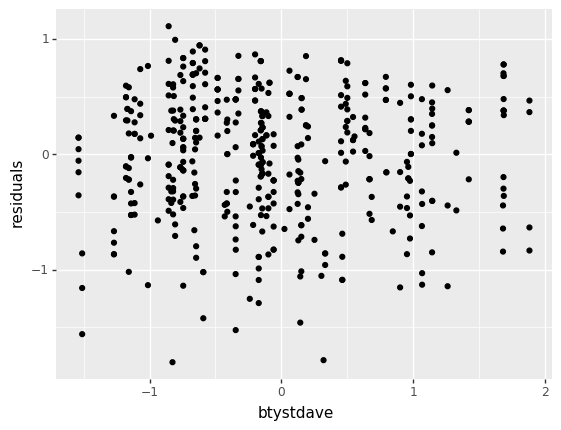

<ggplot: (-2108011696)>

In [12]:
df = dane
df['courseevaluation_pred']=results.predict()
df['residuals']=df['courseevaluation']-df['courseevaluation_pred']
fig1_res=(p9.ggplot(p9.aes(x='btystdave',y='residuals'),data=dane)
      +p9.geom_point())
fig1_res

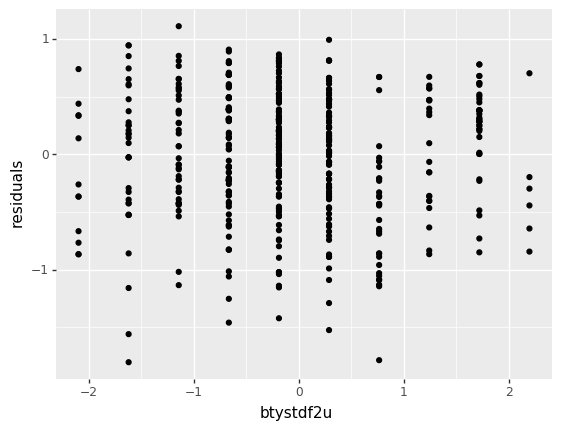

<ggplot: (-2108011675)>

In [13]:
fig1_res=(p9.ggplot(p9.aes(x='btystdf2u',y='residuals'),data=dane)
      +p9.geom_point())
fig1_res

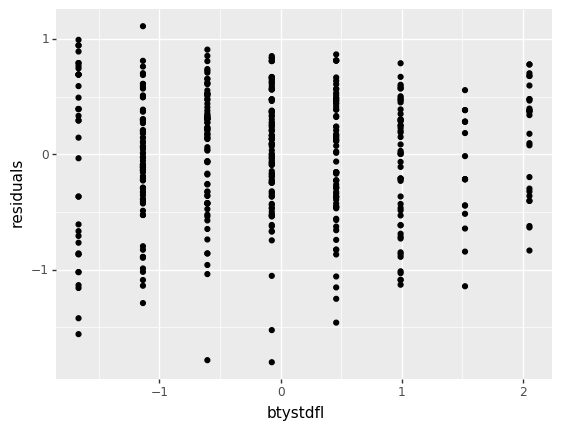

<ggplot: (-2107551634)>

In [14]:
fig1_res=(p9.ggplot(p9.aes(x='btystdfl',y='residuals'),data=dane)
      +p9.geom_point())
fig1_res

In [15]:
results = smf.ols('courseevaluation ~ beautyflowerdiv+beautyfupperdiv +beautyflowerdiv*beautyfupperdiv', data=dane).fit()
wyn=results.params
wyn

Intercept                          3.536817
beautyflowerdiv                    0.056186
beautyfupperdiv                    0.086989
beautyflowerdiv:beautyfupperdiv   -0.008939
dtype: float64

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     6.953
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           0.000139
Time:                        09:00:49   Log-Likelihood:                -373.46
No. Observations:                 463   AIC:                             754.9
Df Residuals:                     459   BIC:                             771.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           3.5368      0.151     23.370      0.000       3.239       3.834
beautyflowerdiv                     0.0562      0.043      1.302      0.193      -0.029       0.141
beautyfupperdiv                     0.0870      0.031      2.784      0.006       0.026       0.148
beautyflowerdiv:beautyfupperdiv    -0.0089      0.007     -1.265      0.207      -0.023       0.005
==============================================================================
Omnibus:                       16.562   Durbin-Watson:                   1.412
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.796
Skew:                          -0.478   Prob(JB):                     0.000137
Kurtosis:                       2.901   Cond. No.                         177.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

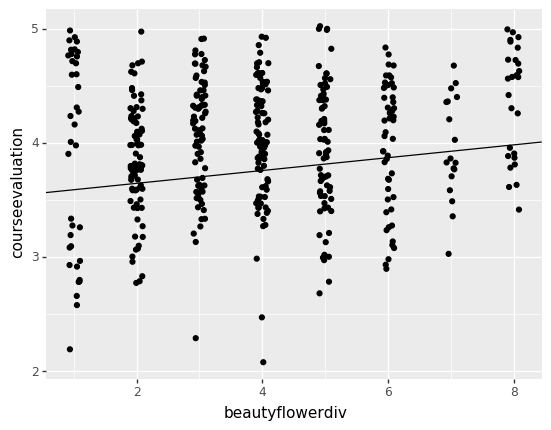

<ggplot: (-2108000694)>

In [17]:
fig1=(p9.ggplot(p9.aes(x='beautyflowerdiv',y='courseevaluation'),data=dane)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['beautyflowerdiv'])))
fig1

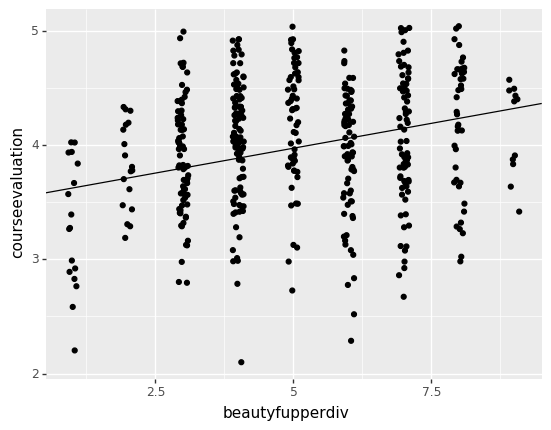

<ggplot: (-2107551523)>

In [18]:
fig1=(p9.ggplot(p9.aes(x='beautyfupperdiv',y='courseevaluation'),data=dane)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['beautyfupperdiv'])))
fig1

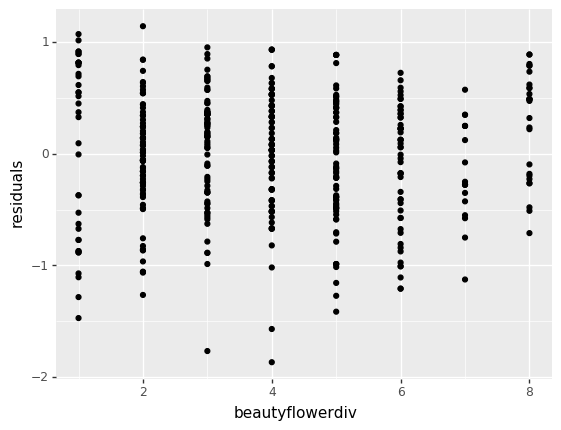

<ggplot: (-2108005028)>

In [19]:
df = dane
df['courseevaluation_pred']=results.predict()
df['residuals']=df['courseevaluation']-df['courseevaluation_pred']
fig1_res=(p9.ggplot(p9.aes(x='beautyflowerdiv',y='residuals'),data=dane)
      +p9.geom_point())
fig1_res

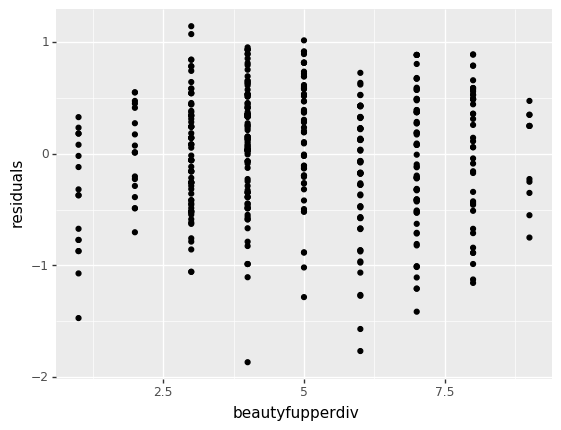

<ggplot: (39457657)>

In [20]:
fig1_res=(p9.ggplot(p9.aes(x='beautyfupperdiv',y='residuals'),data=dane)
      +p9.geom_point())
fig1_res